In [3]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
tips = Table.read_table("tips.csv")


# 1. 

In [5]:
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


C:\Users\C20Bret.Crew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


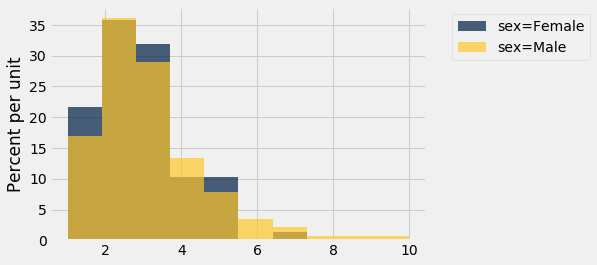

In [4]:
bar_data = tips.select("tip","sex").hist("tip",group="sex")

C:\Users\C20Bret.Crew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


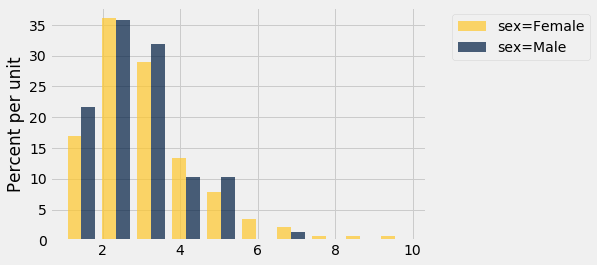

In [5]:
tips.select("tip","sex").hist("tip",group="sex",side_by_side=True)

C:\Users\C20Bret.Crew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


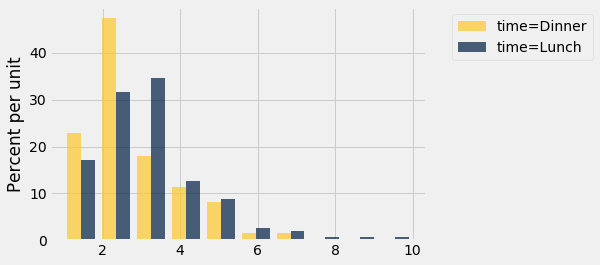

In [6]:
tips.select("tip","time").hist("tip",group="time",side_by_side=True)

# 2.

In [7]:
def weekday_to_num(day):
    if day == "Mon":
        return 1
    if day == "Tues":
        return 2
    if day == "Wed":
        return 3
    if day == "Thur":
        return 4
    if day == "Fri":
        return 5
    if day == "Sat":
        return 6
    if day == "Sun":
        return 7

# 3.

In [8]:
new_col = []
for day in(tips[4]):
    new_col.append(weekday_to_num(day))
tips.append_column("weekday_num",new_col)
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


# 4.

In [6]:
def est_tip(near,bill):
    tip = sum(tips.where("total_bill",are.between(bill-near,bill+near))[1])/len(tips.where("total_bill",are.between(bill-near,bill+near))[1])
    return tip

# 5.

In [15]:
estimate = []
for bill in(tips[0]):
    estimate.append(est_tip(1,bill).round(2))
tips.append_column("est_tip",estimate)
tips

total_bill,tip,sex,smoker,day,time,size,est_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82
10.34,1.66,Male,No,Sun,Dinner,3,1.81
21.01,3.5,Male,No,Sun,Dinner,3,3.34
23.68,3.31,Male,No,Sun,Dinner,2,3.34
24.59,3.61,Female,No,Sun,Dinner,4,3.56
25.29,4.71,Male,No,Sun,Dinner,4,4.2
8.77,2,Male,No,Sun,Dinner,2,1.86
26.88,3.12,Male,No,Sun,Dinner,4,3.48
15.04,1.96,Male,No,Sun,Dinner,2,2.43
14.78,3.23,Male,No,Sun,Dinner,2,2.44


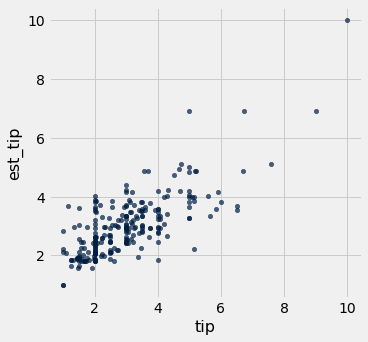

In [16]:
tips.scatter("tip","est_tip")